In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
raw_df = pd.read_csv('Data/minecraft.csv')
raw_df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,669113045329427,A portal has appeared! Where are you going? 🤔\...,A portal has appeared! Where are you going? 🤔\...,NaN,A portal has appeared! Where are you going? 🤔,2023-11-10 16:33:31,1699634011,NaN,https://scontent-xsp1-2.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/minecraft/posts/66911...,"{'thích': 503, 'yêu thích': 209, 'haha': 3, 'w...",725,NaN,165039663531531,NaN,NaN,[],False,2023-11-11 11:17:35.696480
1,668690402038358,The new Minecraft Hour of Code is dropping nex...,The new Minecraft Hour of Code is dropping nex...,NaN,The new Minecraft Hour of Code is dropping nex...,2023-11-09 21:20:33,1699564833,NaN,https://scontent-xsp1-2.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/minecraft/posts/66869...,"{'thích': 184, 'yêu thích': 58, 'wow': 1, 'thư...",248,"[{'name': 'Minecraft Education', 'link': '/pla...",165039663531531,NaN,NaN,[],False,2023-11-11 11:17:57.975056
2,668087778765287,▶️ Come say hi to the new Armadillo mob!\n\nJo...,▶️ Come say hi to the new Armadillo mob!\n\nJo...,NaN,▶️ Come say hi to the new Armadillo mob!\n\nJo...,2023-11-08 16:24:32,1699460672,NaN,https://scontent-xsp1-3.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/minecraft/posts/66808...,"{'thích': 345, 'yêu thích': 108, 'haha': 6, 'w...",508,NaN,165039663531531,NaN,NaN,[],False,2023-11-11 11:18:10.707453
3,668060778767987,🚨 A new challenge approaches! 🚨\n\nGet a peek ...,🚨 A new challenge approaches! 🚨\n\nGet a peek ...,NaN,NaN,2023-11-08 15:17:34,1699456654,https://scontent-xsp1-3.xx.fbcdn.net/v/t39.308...,https://scontent-xsp1-3.xx.fbcdn.net/v/t39.308...,['https://scontent-xsp1-3.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/minecraft/posts/66806...,"{'thích': 1947, 'yêu thích': 1102, 'haha': 12,...",3143,NaN,165039663531531,NaN,6.680598e+14,['668059775434754'],False,2023-11-11 11:18:38.358868
4,667677382139660,With your lightsaber in hand and your trusty d...,With your lightsaber in hand and your trusty d...,NaN,With your lightsaber in hand and your trusty d...,2023-11-07 19:02:23,1699383743,NaN,https://scontent-xsp2-1.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/minecraft/posts/66767...,"{'thích': 518, 'yêu thích': 209, 'haha': 1, 'w...",744,NaN,165039663531531,NaN,NaN,[],False,2023-11-11 11:19:34.592545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6213096298725807,This weekend on May 12th we invite you to join...,This weekend on May 12th we invite you to join...,NaN,NaN,2023-05-10 16:07:42,1683734862,https://scontent-xsp2-1.xx.fbcdn.net/v/t39.308...,https://scontent-xsp2-1.xx.fbcdn.net/v/t39.308...,['https://scontent-xsp2-1.xx.fbcdn.net/v/t39.3...,...,NaN,NaN,0,NaN,165039663531531,NaN,6.213038e+15,['6213037588731678'],False,NaN
146,6209734089062028,"For mobs like the fox and rabbit, it's a battl...","For mobs like the fox and rabbit, it's a battl...",NaN,"For mobs like the fox and rabbit, it's a battl...",2023-05-09 16:02:49,1683648169,NaN,https://scontent-xsp1-2.xx.fbcdn.net/v/t15.525...,[],...,NaN,NaN,0,NaN,165039663531531,NaN,NaN,[],False,NaN
147,6200100663358704,Minecraft meets strategy with a truly unique t...,Minecraft meets strategy with a truly unique t...,NaN,NaN,2023-05-06 18:00:13,1683396013,NaN,https://scontent-xsp2-1.xx.fbcdn.net/v/t15.525...,[],...,NaN,NaN,0,NaN,165039663531531,NaN,NaN,[],False,NaN
148,6199630236739080,Ever wanted to know what suspicious stew taste...,Ever wanted to know what suspicious stew taste...,NaN,NaN,2023-05-06 15:00:31,1683385231,NaN,https://scontent-xsp2-1.xx.fbcdn.net/v/t15.525...,[],...,NaN,NaN,0,NaN,165039663531531,NaN,NaN,[],False,NaN


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        150 non-null    int64  
 1   text                           149 non-null    object 
 2   post_text                      149 non-null    object 
 3   shared_text                    2 non-null      object 
 4   original_text                  49 non-null     object 
 5   time                           150 non-null    object 
 6   timestamp                      150 non-null    int64  
 7   image                          75 non-null     object 
 8   image_lowquality               148 non-null    object 
 9   images                         150 non-null    object 
 10  images_description             150 non-null    object 
 11  images_lowquality              150 non-null    object 
 12  images_lowquality_description  150 non-null    obj

In [4]:
# loại bỏ các cột/hàng dữ liệu bị null/lỗi/không cần thiết
cooked_df = raw_df[raw_df['reactions'].notnull()].drop(['video_duration_seconds','video_height','video_quality','video_size_MB','video_watches',
                                                        'video_width','likes','factcheck','sharers','is_live','was_live', 'image_lowquality',
                                                        'images', 'images_description', 'images_lowquality', 'images_lowquality_description',
                                                        'video_id', 'video_thumbnail', 'post_url', 'shared_text', 'link', 'links', 'shared_post_id', 'shared_time',
                                                        'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'with', 'image_id',
                                                        'image_ids', 'fetched_time', 'w3_fb_url', 'reactors', 'page_id', 'user_id', 'user_url', 'username'], axis=1)
cooked_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_id         144 non-null    int64 
 1   text            143 non-null    object
 2   post_text       143 non-null    object
 3   original_text   48 non-null     object
 4   time            144 non-null    object
 5   timestamp       144 non-null    int64 
 6   image           74 non-null     object
 7   video           60 non-null     object
 8   comments        144 non-null    int64 
 9   shares          144 non-null    int64 
 10  comments_full   144 non-null    object
 11  reactions       144 non-null    object
 12  reaction_count  144 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 15.8+ KB


# Thống kê về reaction

In [5]:
react_df = cooked_df[['post_id', 'reactions', 'reaction_count', 'comments', 'shares']]

react_df

,post_id,reactions,reaction_count,comments,shares
0,669113045329427,"{'thích': 503, 'yêu thích': 209, 'haha': 3, 'w...",725,118,17
1,668690402038358,"{'thích': 184, 'yêu thích': 58, 'wow': 1, 'thư...",248,18,2
2,668087778765287,"{'thích': 345, 'yêu thích': 108, 'haha': 6, 'w...",508,58,14
3,668060778767987,"{'thích': 1947, 'yêu thích': 1102, 'haha': 12,...",3143,185,82
4,667677382139660,"{'thích': 518, 'yêu thích': 209, 'haha': 1, 'w...",744,71,45
...,...,...,...,...,...
139,6232785333423570,"{'thích': 864, 'yêu thích': 478, 'haha': 25, '...",1420,112,76
140,6229415033760600,"{'thích': 799, 'yêu thích': 456, 'haha': 3, 'w...",1283,74,16
141,6227100197325417,"{'thích': 1234, 'yêu thích': 524, 'haha': 6, '...",1800,115,41
142,6220265584675545,"{'thích': 1488, 'yêu thích': 1056, 'haha': 10,...",2618,757,81


### Phân tích từng loại react

In [6]:
cooked_df['reactions'] = cooked_df['reactions'].apply(lambda x : dict(eval(x)))
full_react = cooked_df['reactions'].apply(pd.Series)

all_reactions = pd.concat([cooked_df, full_react], axis=1).drop('reactions', axis=1)
all_reactions = all_reactions.fillna(0)
just_react = all_reactions[['post_id','post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương','shares','comments','reaction_count']]
just_react

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10352\139454873.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  full_react = cooked_df['reactions'].apply(pd.Series)


,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,669113045329427,A portal has appeared! Where are you going? 🤔\...,503.0,209.0,3.0,1.0,0.0,1.0,8.0,17,118,725
1,668690402038358,The new Minecraft Hour of Code is dropping nex...,184.0,58.0,0.0,1.0,0.0,0.0,5.0,2,18,248
2,668087778765287,▶️ Come say hi to the new Armadillo mob!\n\nJo...,345.0,108.0,6.0,33.0,0.0,8.0,8.0,14,58,508
3,668060778767987,🚨 A new challenge approaches! 🚨\n\nGet a peek ...,1947.0,1102.0,12.0,43.0,2.0,3.0,34.0,82,185,3143
4,667677382139660,With your lightsaber in hand and your trusty d...,518.0,209.0,1.0,12.0,0.0,0.0,4.0,45,71,744
...,...,...,...,...,...,...,...,...,...,...,...,...
139,6232785333423570,Scan any Minecraft X Crocs clogs to unlock the...,864.0,478.0,25.0,21.0,0.0,1.0,31.0,76,112,1420
140,6229415033760600,Minecraft is celebrating AANHPI Month by uplif...,799.0,456.0,3.0,5.0,0.0,2.0,18.0,16,74,1283
141,6227100197325417,Last call for heroes to join Jens Bergensten (...,1234.0,524.0,6.0,3.0,1.0,1.0,31.0,41,115,1800
142,6220265584675545,What's on the weekend plans in Minecraft? 📃,1488.0,1056.0,10.0,7.0,4.0,2.0,51.0,81,757,2618


In [7]:
# tạo cột lưu độ dài bài viết
all_reactions['text'] = all_reactions['text'].astype(str)
all_reactions['post_text_length'] = all_reactions['text'].apply(len)
all_reactions['post_text_length'].head(10)

0     92
1    197
2    421
3    183
4    944
5    631
6     74
7     70
8    263
9    735
Name: post_text_length, dtype: int64

### Các bài viết có lượng reaction cao nhất

In [8]:
just_react.loc[all_reactions['reaction_count'] == all_reactions['reaction_count'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
91,609493631291369,🟩🟩🟩🟩🟩🟩🟩🟩\n🟩🟩🟩🟩🟩🟩🟩🟩\n🟩⬛⬛🟩🟩⬛⬛🟩\n🟩⬛⬛🟩🟩⬛⬛🟩\n🟩🟩🟩⬛⬛🟩...,19746.0,29451.0,311.0,198.0,22.0,19.0,893.0,4911,2822,50640


In [9]:
just_react.loc[all_reactions['thích'] == all_reactions['thích'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
91,609493631291369,🟩🟩🟩🟩🟩🟩🟩🟩\n🟩🟩🟩🟩🟩🟩🟩🟩\n🟩⬛⬛🟩🟩⬛⬛🟩\n🟩⬛⬛🟩🟩⬛⬛🟩\n🟩🟩🟩⬛⬛🟩...,19746.0,29451.0,311.0,198.0,22.0,19.0,893.0,4911,2822,50640


In [10]:
just_react.loc[all_reactions['yêu thích'] == all_reactions['yêu thích'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
91,609493631291369,🟩🟩🟩🟩🟩🟩🟩🟩\n🟩🟩🟩🟩🟩🟩🟩🟩\n🟩⬛⬛🟩🟩⬛⬛🟩\n🟩⬛⬛🟩🟩⬛⬛🟩\n🟩🟩🟩⬛⬛🟩...,19746.0,29451.0,311.0,198.0,22.0,19.0,893.0,4911,2822,50640


In [11]:
just_react.loc[all_reactions['haha'] == all_reactions['haha'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
10,664229049151160,⚠️: This is a public service announcement\n\n⚠...,4577.0,1161.0,6667.0,123.0,23.0,6.0,60.0,2518,472,12617


In [12]:
just_react.loc[all_reactions['wow'] == all_reactions['wow'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
23,657066693200729,🚨 It’s auto-crafting time! 🚨\n\nTry out the ne...,5088.0,3024.0,62.0,1225.0,10.0,29.0,117.0,532,780,9555


In [13]:
just_react.loc[all_reactions['buồn'] == all_reactions['buồn'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
31,655381423369256,Mob Vote update:\n\nThe penguin has come in 3r...,4776.0,502.0,3080.0,238.0,9902.0,951.0,98.0,1215,2388,19547


In [14]:
just_react.loc[all_reactions['phẫn nộ'] == all_reactions['phẫn nộ'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
39,654698796770852,#MinecraftLive is TOMORROW!🥳\n\nHere's your re...,4853.0,2110.0,286.0,91.0,214.0,7837.0,162.0,630,2954,15553


In [15]:
just_react.loc[all_reactions['thương thương'] == all_reactions['thương thương'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
116,6308661565835946,The Trails & Tales Update is out now! 🙌\n\n▪️ ...,18132.0,17273.0,83.0,286.0,19.0,38.0,915.0,3548,1856,36746


In [16]:
just_react.loc[all_reactions['shares'] == all_reactions['shares'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
91,609493631291369,🟩🟩🟩🟩🟩🟩🟩🟩\n🟩🟩🟩🟩🟩🟩🟩🟩\n🟩⬛⬛🟩🟩⬛⬛🟩\n🟩⬛⬛🟩🟩⬛⬛🟩\n🟩🟩🟩⬛⬛🟩...,19746.0,29451.0,311.0,198.0,22.0,19.0,893.0,4911,2822,50640


In [17]:
just_react.loc[all_reactions['comments'] == all_reactions['comments'].max()]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
39,654698796770852,#MinecraftLive is TOMORROW!🥳\n\nHere's your re...,4853.0,2110.0,286.0,91.0,214.0,7837.0,162.0,630,2954,15553


### chênh lệch tương đối giữa từng loại reaction với lượng share

In [18]:
all_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].corrwith(all_reactions['shares'])

thích            0.829898
yêu thích        0.875412
haha             0.365559
wow              0.282770
buồn             0.100246
phẫn nộ          0.034962
thương thương    0.827474
dtype: float64

### Tương quan giữa các loại reaction

<Axes: >

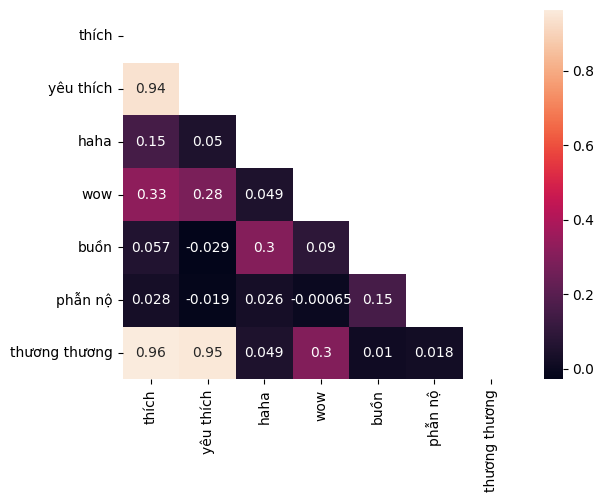

In [19]:
corr = all_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True)

### Tương quan giữa lượng react, comments, shares và post_text_length

<Axes: >

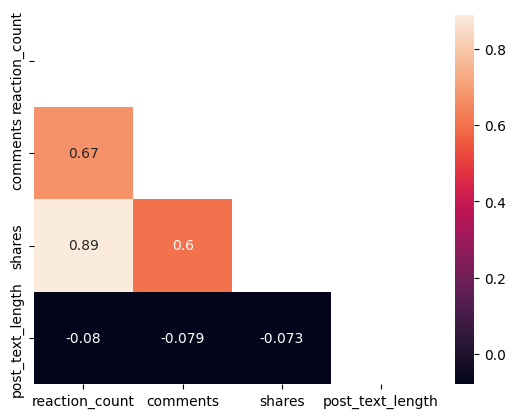

In [20]:
corr = all_reactions[['reaction_count', 'comments', 'shares', 'post_text_length']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True)

### Tỉ lệ giữa các loại reaction

([<matplotlib.patches.Wedge at 0x297accf9090>,
 [Text(0.02550562176393853, 1.0997042617260493, 'thích'),
  Text(-0.4379678025099992, -1.0090511404109122, 'yêu thích'),
  Text(0.8667170622740127, -0.6773489012046195, 'haha'),
  Text(0.9568453045367645, -0.5426297662181337, 'wow'),
  Text(1.0080556949821102, -0.4402541491163203, 'buồn'),
  Text(1.0717082301977807, -0.2478738980335384, 'phẫn nộ'),
  Text(1.0983757387288524, -0.05975564050236511, 'thương thương')],
 [Text(0.01391215732578465, 0.5998386882142086, '49.3%'),
  Text(-0.23889152864181773, -0.5503915311332248, '38.4%'),
  Text(0.4727547612403705, -0.36946303702070155, '3.5%'),
  Text(0.521915620656417, -0.29597987248261837, '1.2%'),
  Text(0.5498485608993328, -0.24013862679072012, '2.1%'),
  Text(0.5845681255624258, -0.13520394438193, '3.8%'),
  Text(0.5991140393066468, -0.03259398572856278, '1.7%')])

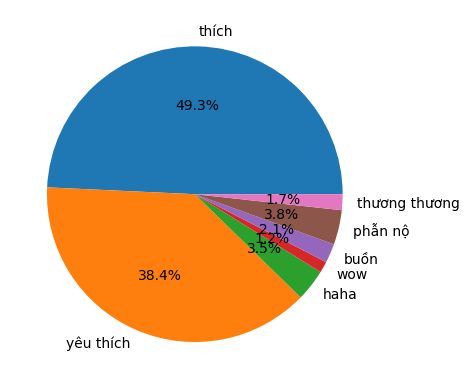

In [21]:
plt.pie(all_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].sum(),
        labels=['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương'],
        autopct='%1.1f%%')

### Biểu đồ trực quan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10352\1891594525.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(all_reactions['time'], rotation=90)


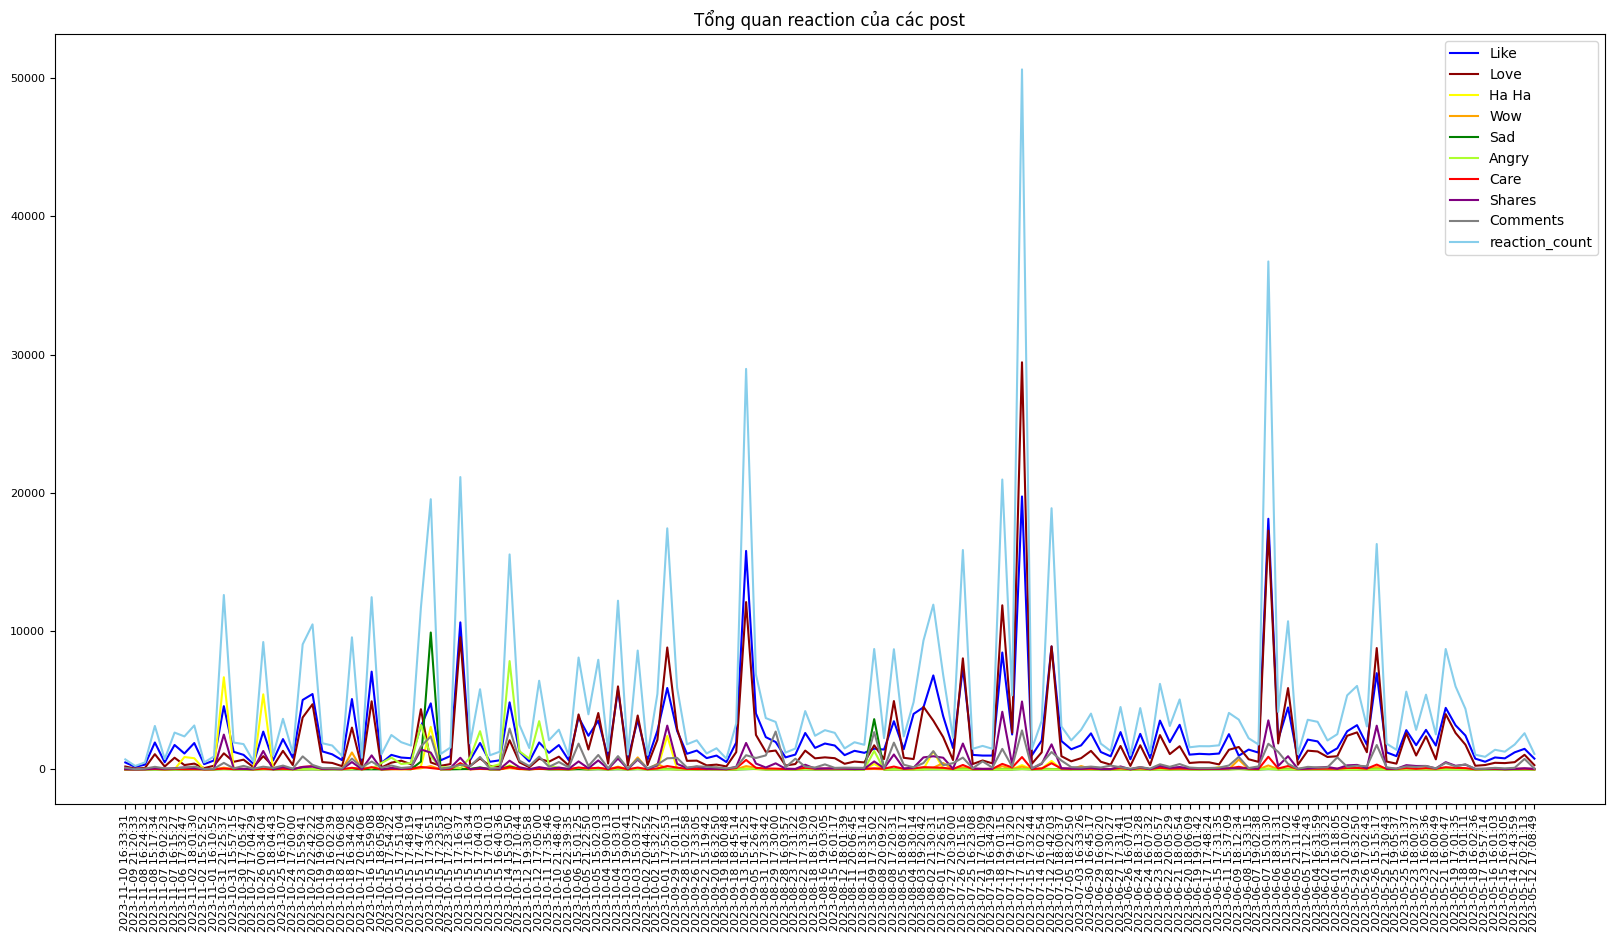

In [22]:
plot_ob = plt.subplots(figsize=(20, 10))

fig, ax = plot_ob

ax.plot(all_reactions['time'], all_reactions['thích'], label = "Like", c='blue')
ax.plot(all_reactions['time'], all_reactions['yêu thích'], label = "Love", c='darkred')
ax.plot(all_reactions['time'], all_reactions['haha'], label = "Ha Ha", c='yellow')
ax.plot(all_reactions['time'], all_reactions['wow'], label = "Wow", c='orange')
ax.plot(all_reactions['time'], all_reactions['buồn'], label = "Sad", c='green')
ax.plot(all_reactions['time'], all_reactions['phẫn nộ'], label = "Angry", c='greenyellow')
ax.plot(all_reactions['time'], all_reactions['thương thương'], label = "Care", c='red')
ax.plot(all_reactions['time'], all_reactions['shares'], label = "Shares", c='purple')
ax.plot(all_reactions['time'], all_reactions['comments'], label = "Comments", c='gray')
ax.plot(all_reactions['time'], all_reactions['reaction_count'], label = "reaction_count", c='skyblue')
ax.set_xticklabels(all_reactions['time'], rotation=90)
ax.tick_params(labelsize=8)
plt.title('Tổng quan reaction của các post')
plt.legend()

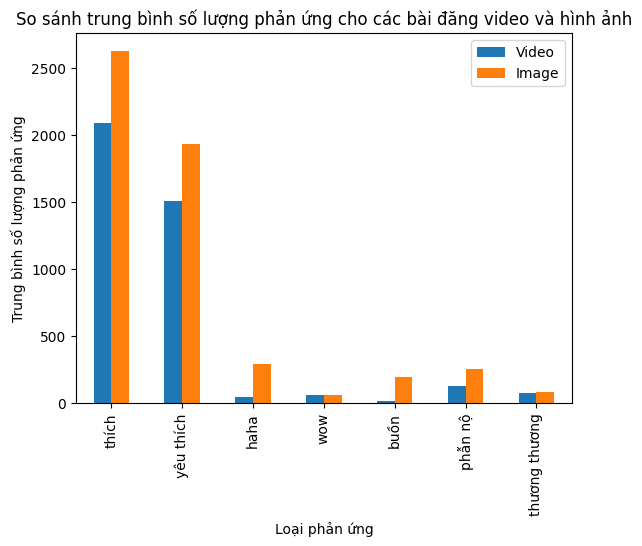

In [23]:
video_df = all_reactions[all_reactions['video'] != 0]
image_df = all_reactions[all_reactions['image'] != 0]

video_reactions = video_df[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].mean()
image_reactions = image_df[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].mean()

data = {'Video': video_reactions, 'Image': image_reactions}
df = pd.DataFrame(data)

df.plot(kind='bar', stacked=False)
plt.title('So sánh trung bình số lượng phản ứng cho các bài đăng video và hình ảnh')
plt.xlabel('Loại phản ứng')
plt.ylabel('Trung bình số lượng phản ứng')
plt.show()

## Tương tác khi bắt đầu thông báo và kết thúc sự kiện #MinecraftLive

In [24]:
minecraftlive_df = all_reactions.loc[(all_reactions['time'] <= '2023-10-18 21:06:08') & (all_reactions['time'] >= '2023-09-13 15:41:25')].copy()
minecraftlive_df = minecraftlive_df.reset_index(drop=True)
minecraftlive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           42 non-null     int64  
 1   text              42 non-null     object 
 2   post_text         42 non-null     object 
 3   original_text     42 non-null     object 
 4   time              42 non-null     object 
 5   timestamp         42 non-null     int64  
 6   image             42 non-null     object 
 7   video             42 non-null     object 
 8   comments          42 non-null     int64  
 9   shares            42 non-null     int64  
 10  comments_full     42 non-null     object 
 11  reaction_count    42 non-null     int64  
 12  thích             42 non-null     float64
 13  yêu thích         42 non-null     float64
 14  haha              42 non-null     float64
 15  wow               42 non-null     float64
 16  thương thương     42 non-null     float64
 17 

Text(0, 0.5, 'Trung bình số lượng phản ứng')

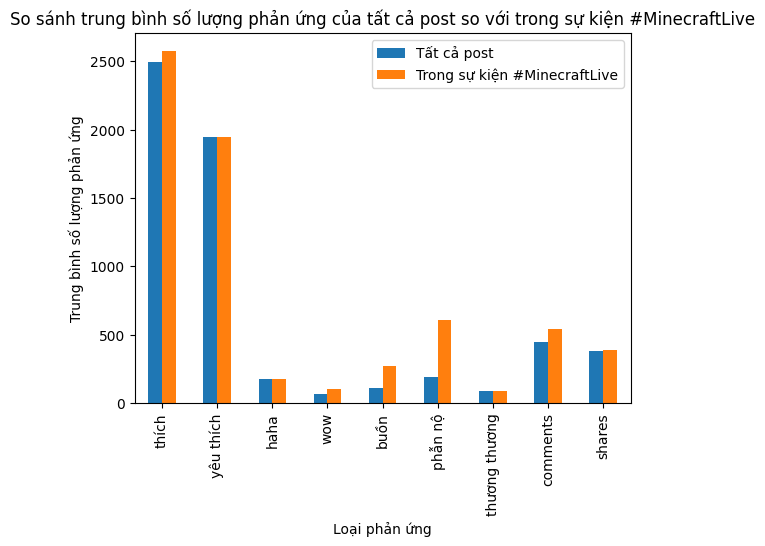

In [25]:
all_post = all_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'comments', 'shares']].mean()
minecraftlive_reaction = minecraftlive_df[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'comments', 'shares']].mean()

data1 = {'Tất cả post': all_post, 'Trong sự kiện #MinecraftLive': minecraftlive_reaction}
df1 = pd.DataFrame(data1)

df1.plot(kind='bar', stacked=False)
plt.title('So sánh trung bình số lượng phản ứng của tất cả post so với trong sự kiện #MinecraftLive')
plt.xlabel('Loại phản ứng')
plt.ylabel('Trung bình số lượng phản ứng')


# Thống kê về bài đăng

## Bài đăng của tất cả post (144)

Text(0, 0.5, 'Số bài đăng trong ngày')

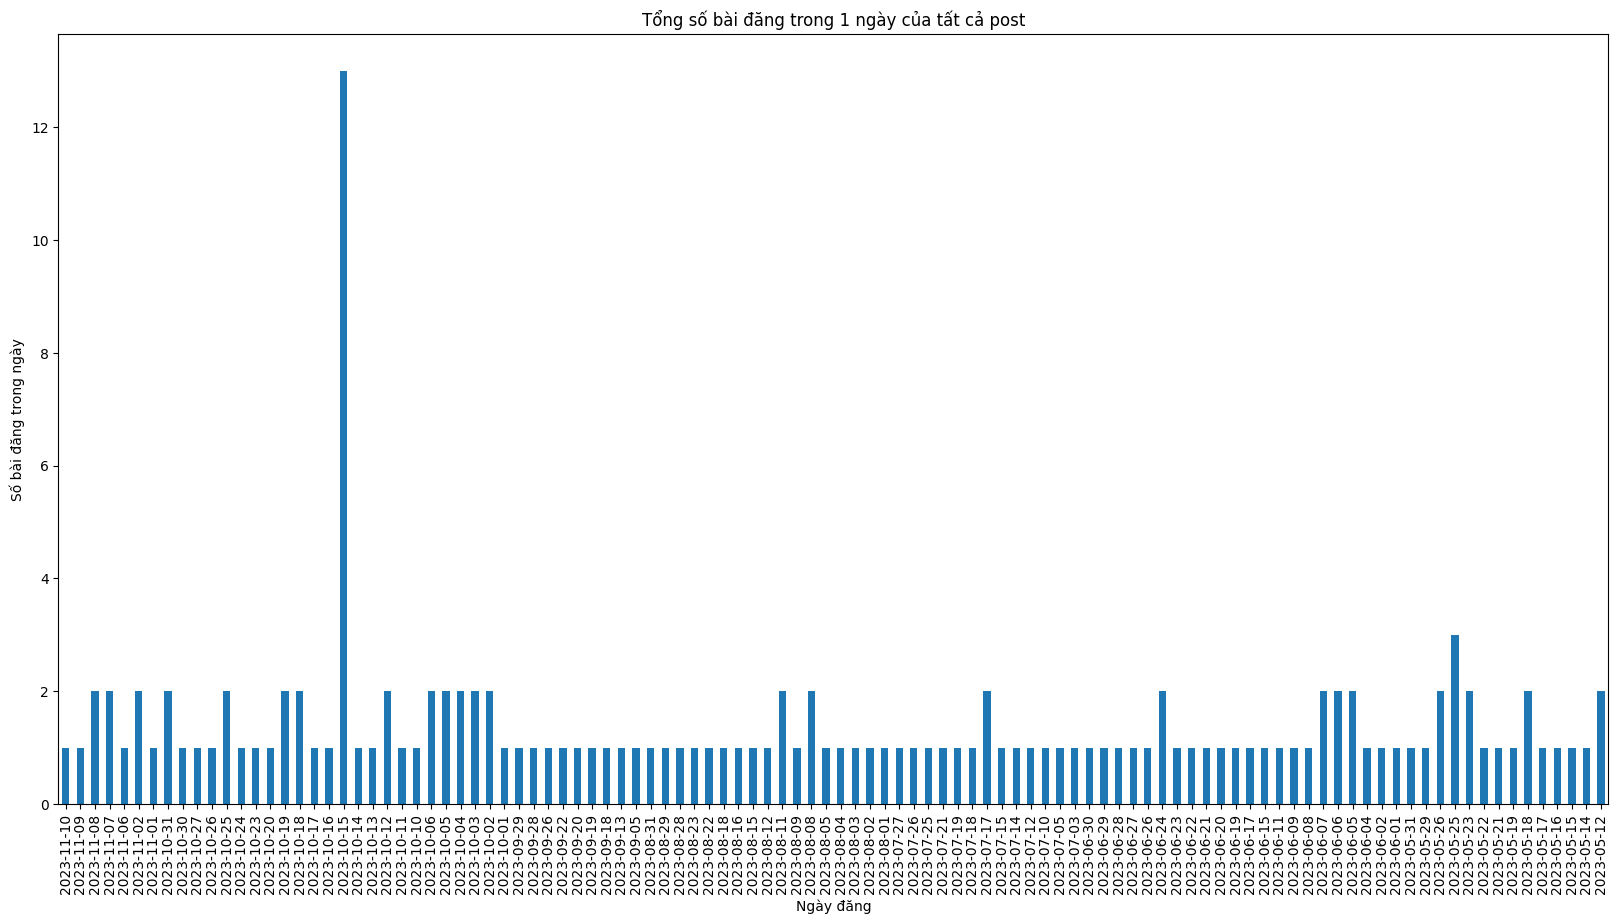

In [26]:
cooked_fre_day = cooked_df.copy()
cooked_fre_day['time'] = pd.to_datetime(cooked_fre_day['time'])
cooked_fre_day['time'] = cooked_fre_day['time'].dt.date

cooked_fre_day['time'].value_counts().sort_index(ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('Tổng số bài đăng trong 1 ngày của tất cả post')
plt.xlabel('Ngày đăng')
plt.ylabel('Số bài đăng trong ngày')


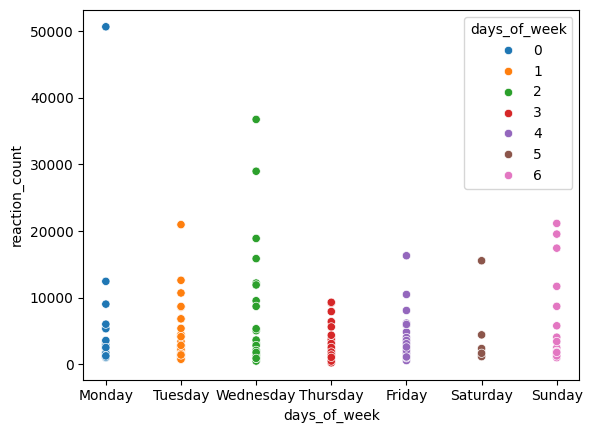

In [27]:
all_reactions['days_of_week'] = pd.to_datetime(all_reactions['time'])
all_reactions['days_of_week'] = all_reactions['days_of_week'].dt.day_of_week

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.scatterplot(x=all_reactions['days_of_week'], y=all_reactions['reaction_count'], hue=all_reactions['days_of_week'], palette='tab10')
plt.xticks(range(7), days_of_week)
plt.show()


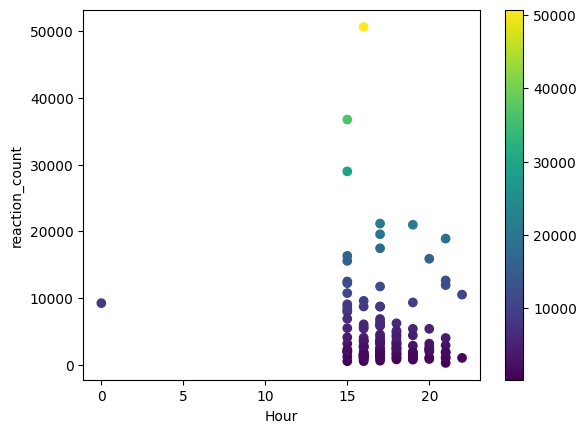

In [28]:
# cooked_fre_hour = cooked_df.copy()
all_reactions['hours'] = pd.to_datetime(all_reactions['time'])
all_reactions['hours'] = all_reactions['hours'].dt.hour

plt.scatter(all_reactions['hours'], all_reactions['reaction_count'], c=all_reactions['reaction_count'])
plt.xlabel('Hour')
plt.ylabel('reaction_count')
plt.colorbar()


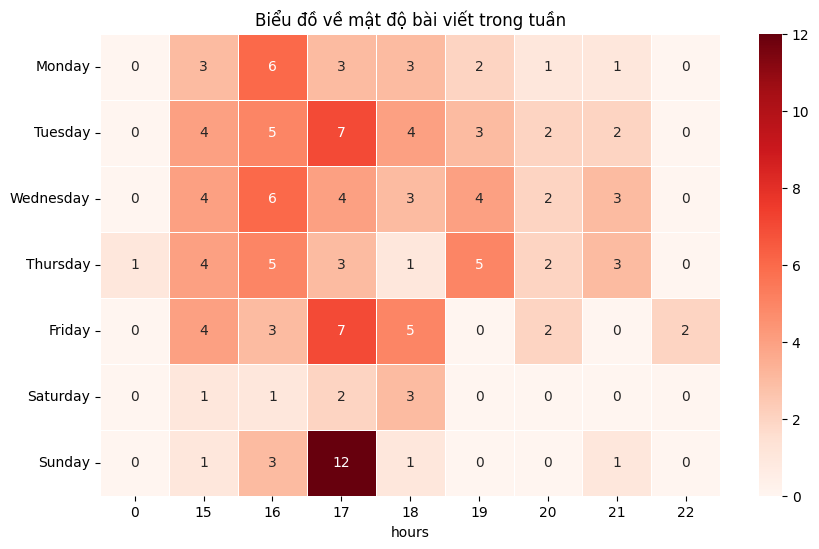

In [29]:
import calendar
days_of_week_names = list(calendar.day_name)
hour_week_df = all_reactions.pivot_table(index='days_of_week', columns='hours', aggfunc='size', fill_value=0)
hour_week_df.index = days_of_week_names
plt.figure(figsize=(10,6))
color_pal = sns.color_palette('Reds', as_cmap=True)
sns.heatmap(hour_week_df, cmap=color_pal, annot=True, fmt='d', linewidths=0.5)
plt.title('Biểu đồ về mật độ bài viết trong tuần')
plt.show()


## Bài đăng trong sự kiện #MinecraftLive

Text(0, 0.5, 'Số bài đăng trong ngày')

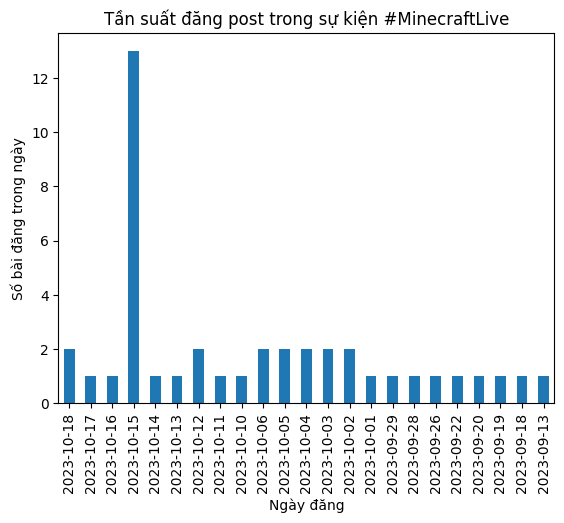

In [30]:
minecraftlive_fre = minecraftlive_df.copy()
minecraftlive_fre['time'] = pd.to_datetime(minecraftlive_fre['time'])
minecraftlive_fre['time'] = minecraftlive_fre['time'].dt.date

minecraftlive_fre['time'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title('Tần suất đăng post trong sự kiện #MinecraftLive')
plt.xlabel('Ngày đăng')
plt.ylabel('Số bài đăng trong ngày')

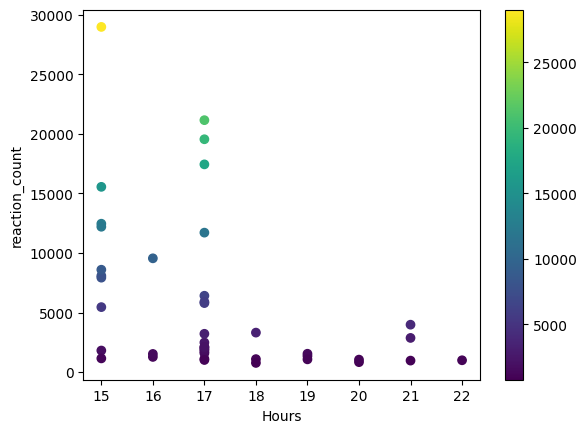

In [31]:
# minecraftlive_fre_hour = minecraftlive_df.copy()
minecraftlive_df['hours'] = pd.to_datetime(minecraftlive_df['time'])
minecraftlive_df['hours'] = minecraftlive_df['hours'].dt.hour

plt.scatter(minecraftlive_df['hours'], minecraftlive_df['reaction_count'], c=minecraftlive_df['reaction_count'])
plt.xlabel('Hours')
plt.ylabel('reaction_count')
plt.colorbar()

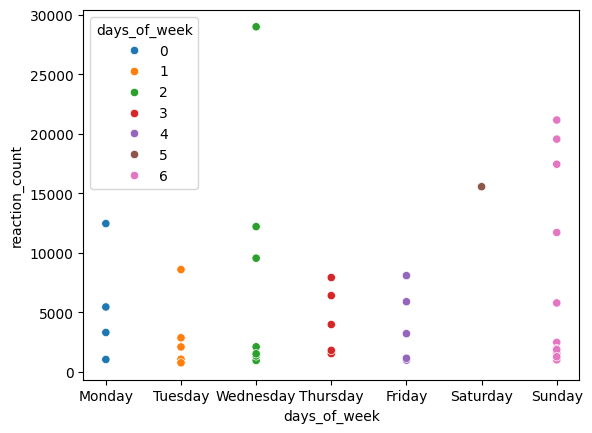

In [32]:
minecraftlive_df['days_of_week'] = pd.to_datetime(minecraftlive_df['time'])
minecraftlive_df['days_of_week'] = minecraftlive_df['days_of_week'].dt.dayofweek

sns.scatterplot(x=minecraftlive_df['days_of_week'], y=minecraftlive_df['reaction_count'], 
                hue=minecraftlive_df['days_of_week'], palette='tab10')
plt.xticks(range(7), days_of_week)
plt.show()

## So sánh

Text(0, 0.5, 'Số lượng post')

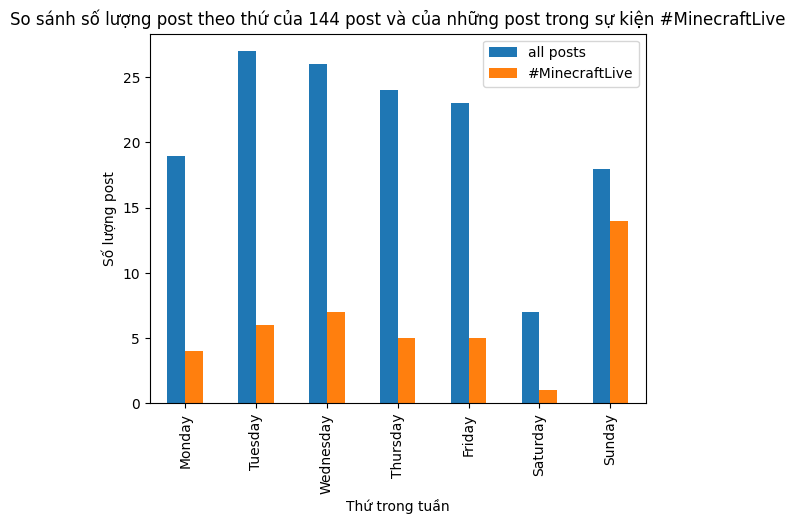

In [33]:
week = {'all posts': all_reactions['days_of_week'].value_counts().sort_index(),
        '#MinecraftLive': minecraftlive_df['days_of_week'].value_counts().sort_index()}
week_df = pd.DataFrame(week)

axx=week_df.plot(kind='bar')
axx.set_xticklabels(days_of_week)
plt.title('So sánh số lượng post theo thứ của 144 post và của những post trong sự kiện #MinecraftLive')
plt.xlabel('Thứ trong tuần')
plt.ylabel('Số lượng post')

Text(0, 0.5, 'Số lượng post')

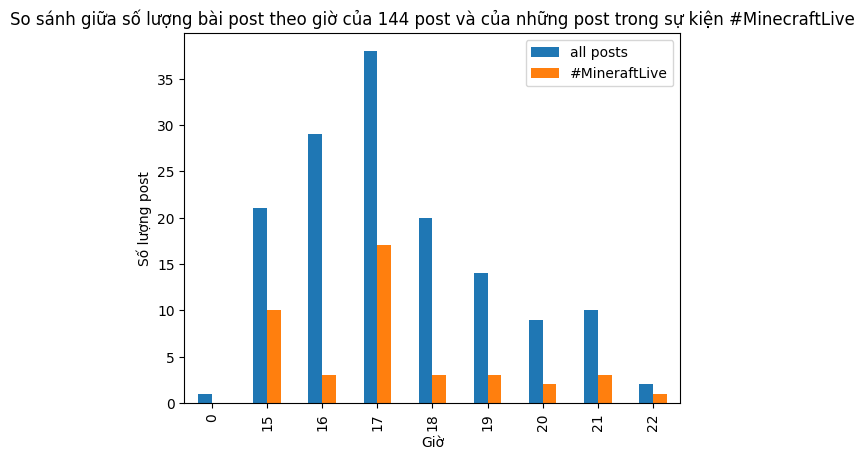

In [34]:
hour = {'all posts': all_reactions['hours'].value_counts(), '#MineraftLive': minecraftlive_df['hours'].value_counts()}
hour_df = pd.DataFrame(hour)
hour_df.plot(kind='bar')
plt.title('So sánh giữa số lượng bài post theo giờ của 144 post và của những post trong sự kiện #MinecraftLive')
plt.xlabel('Giờ')
plt.ylabel('Số lượng post')

## STOPWORD

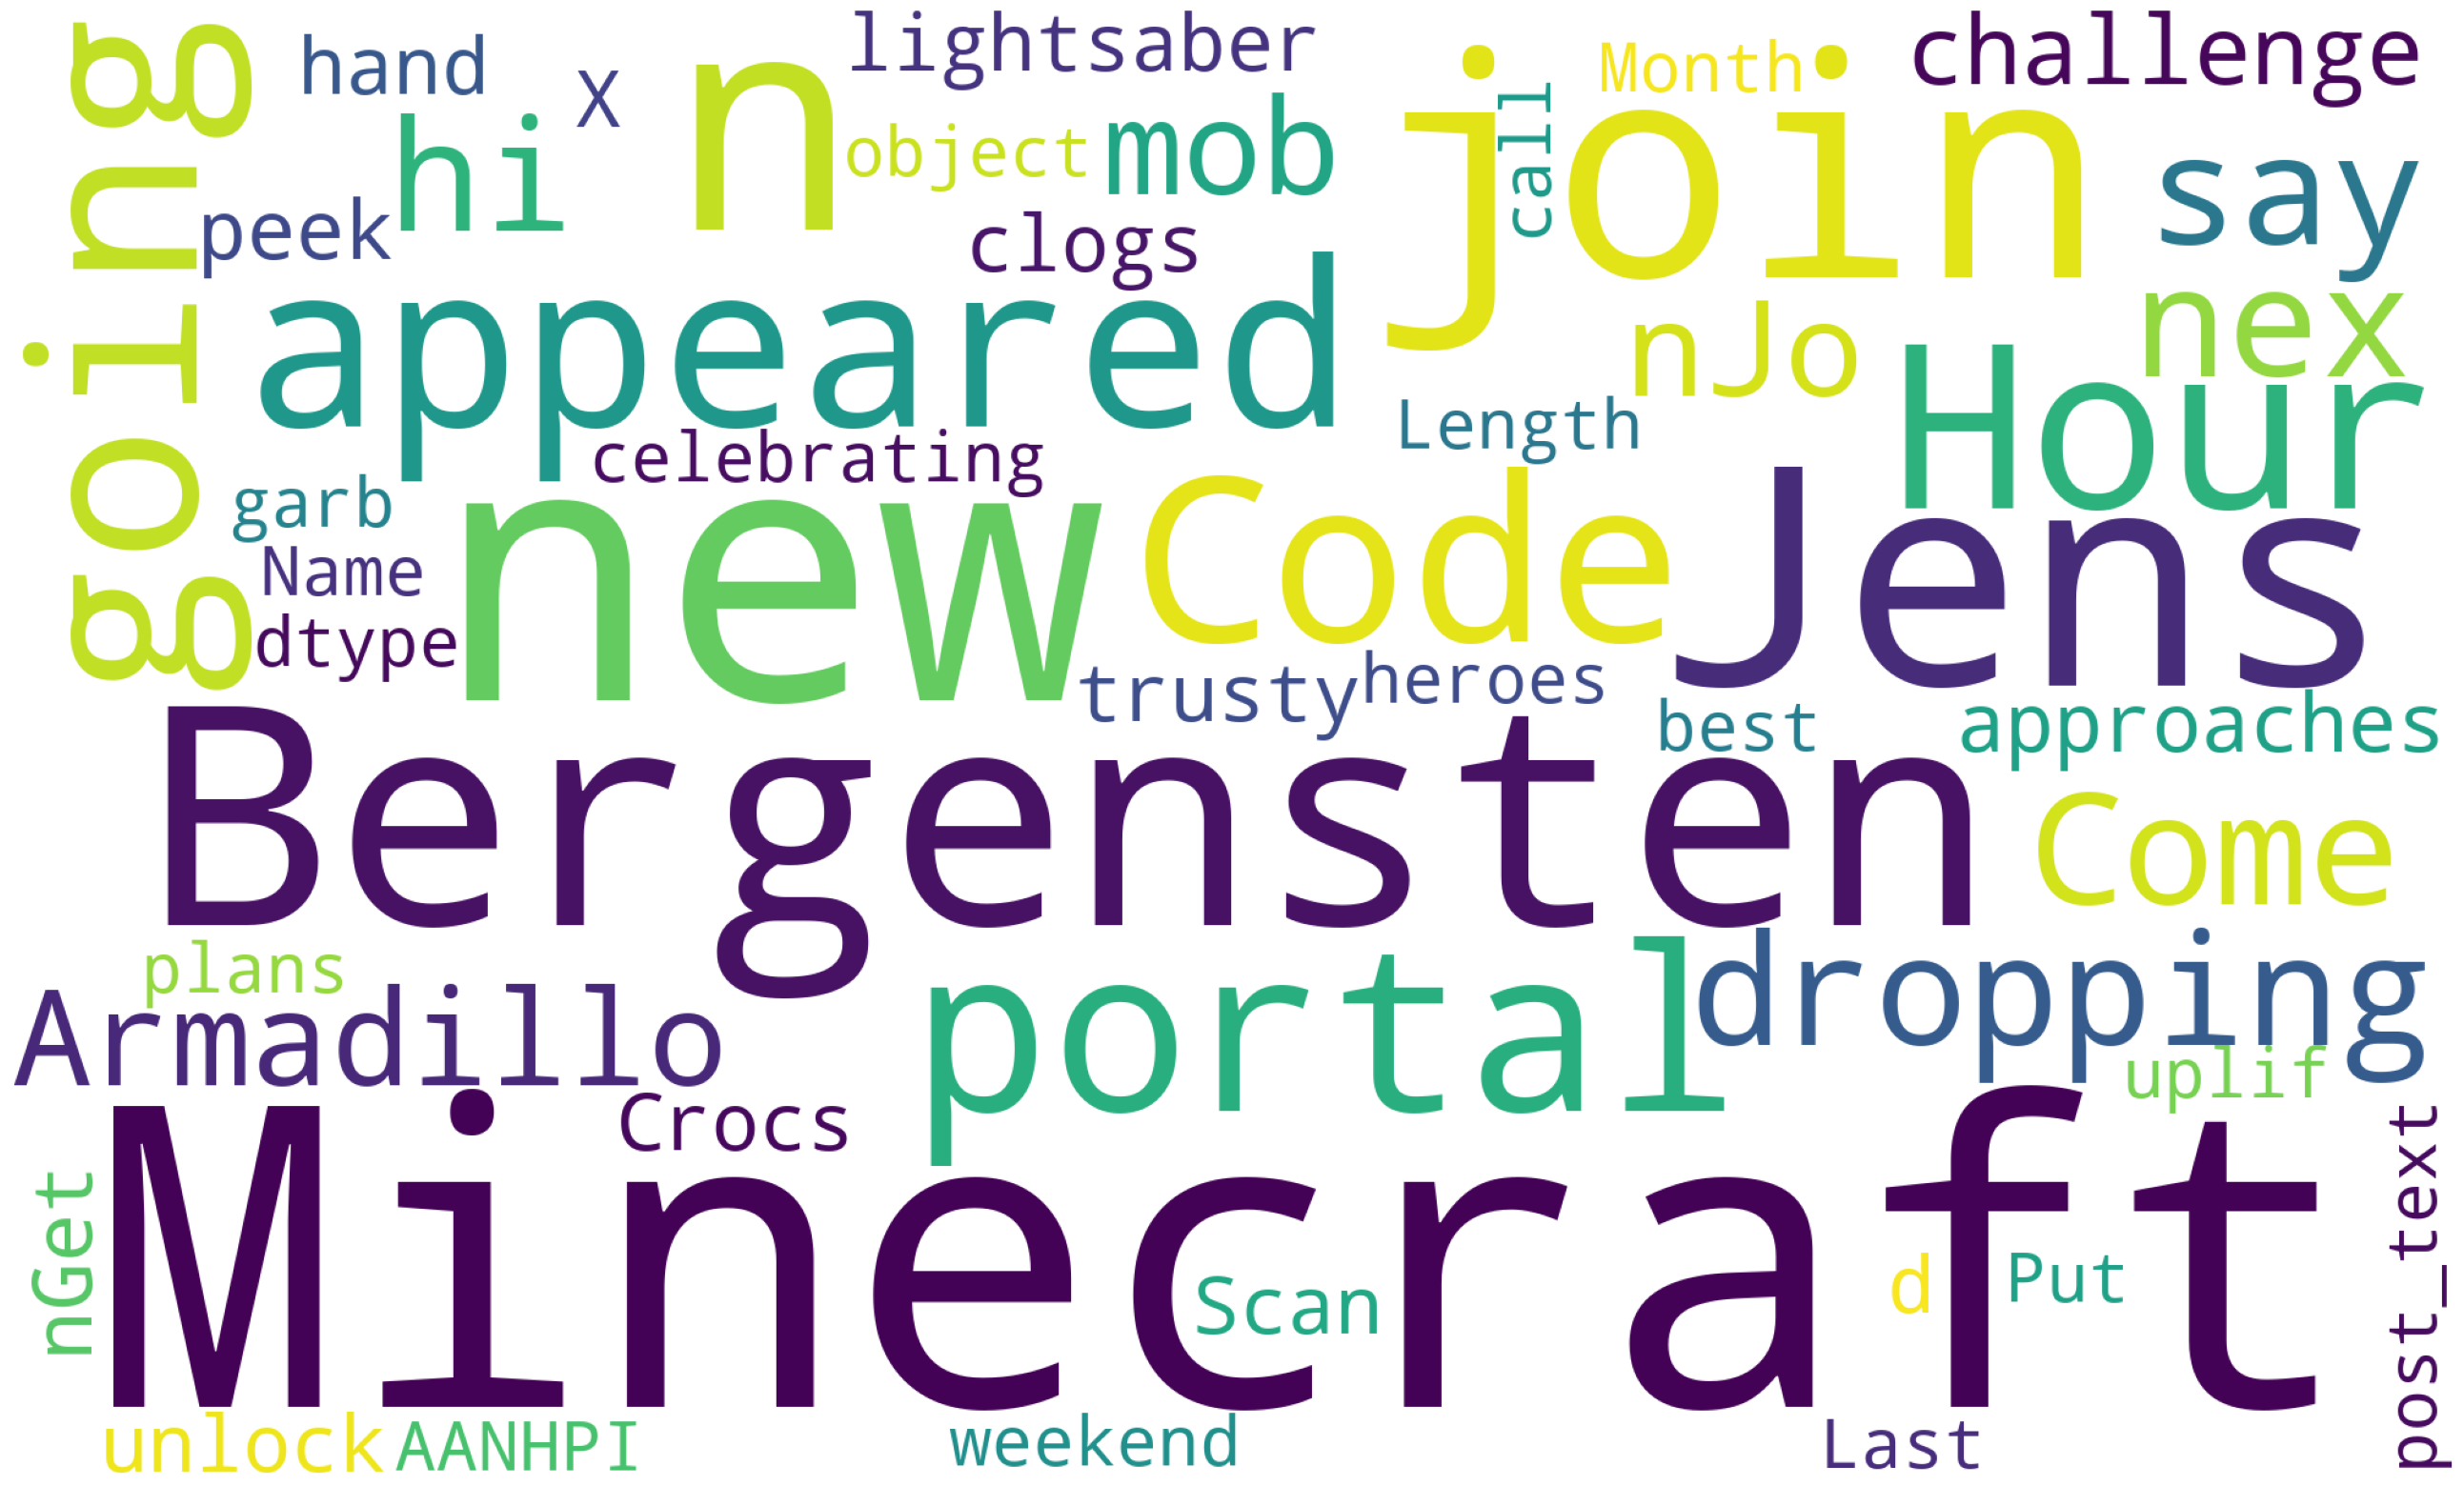

In [35]:
text = str(cooked_df['post_text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Thống kê về comment

In [36]:
def DateTimeReplace(inputStr : str = None):
    while ('datetime.datetime' in inputStr):
        startIdx = inputStr.find('datetime.datetime')
        endIdx = startIdx
        for endIdx in range(startIdx,len(inputStr)):
            if (inputStr[endIdx-1:endIdx+1] == "),"):
                break
        inputStr = inputStr.replace(inputStr[startIdx:endIdx],"''")
    return inputStr

In [37]:
import ast

df = cooked_df
comment = []
name_id = []
for i in range(144):
    raw_comment = DateTimeReplace(df['comments_full'].iloc[i]) # Xử lý datetime.datetime() để sử dụng ast.literal_eval, nếu không sẽ bị lỗi parse
    list_comments = ast.literal_eval(raw_comment) # Parse comment từ str sang list/dict
    name_id.extend(list(map(lambda d: {'commenter_name': d['commenter_name'], 'commenter_id': d['commenter_id']}, 
                         filter(lambda d: 'commenter_name' in d and 'commenter_id' in d, list_comments)))) # Lấy tên và id của những người bình luận chính
    comment.append('\n'.join([comment['comment_text'] for comment in list_comments ])) # Lấy nội dung bình luận
comment

['Mmmh new world ? After fire world let\'s go aqua world ? Or aether ? \'-\'\nDiscord.gg/\noniioncraft\nSomewhere where my boundaries are being respected\nHome - to my friend\'s lost "Life in the Woods"-gameplay\n-world\n#Gronkh\nTo a JRR Tolkien inspired world . On bedrock, and not modded.\nI have an appointment with eternity and I don\'t want to be late... ;)\nTo the end in the end within the end😂😂😂😂\nObviously not to the new dimension\nHopefully wherever the ancient city portal takes us. If you mean the nether portal only, probably through the nether as a shortcut to a specific biome.\nI take the portal back and I’m teleported to a random location in water 😤\nHopefully the fortress where The King lies ahead.... 👑🧡\n\n.... oh wait this is a different Minecraft.\n...back to Minecraft Live, hoping it will be a better show.\nThe same exact place we\'ve been going for so long...... 🤦\nThe Bastion Remnants.\nA un futuro dónde haya End Update XD\nteleported somewhere underground,in a small

In [38]:
name_id

[{'commenter_name': 'Teddy Kyuta Lemasson', 'commenter_id': '1156745049'},
 {'commenter_name': 'Sebastian Radtke', 'commenter_id': '100000778900890'},
 {'commenter_name': 'Davin van der Gragt', 'commenter_id': '100005111139229'},
 {'commenter_name': 'Freddy Fisch', 'commenter_id': '100001492757059'},
 {'commenter_name': 'Tiffiany Elizabeth Richmond-Ramsey',
  'commenter_id': '580434546'},
 {'commenter_name': 'Jon Cook', 'commenter_id': '1363788353'},
 {'commenter_name': 'Ethan Jeavons', 'commenter_id': '100019600231292'},
 {'commenter_name': 'Paul Draicchio', 'commenter_id': '557637525'},
 {'commenter_name': 'Caleb Samuel Lewis', 'commenter_id': '1593121646'},
 {'commenter_name': 'Steven Garnet', 'commenter_id': '100000575045872'},
 {'commenter_name': 'Zelda Rocca', 'commenter_id': '100027394251027'},
 {'commenter_name': 'Dominik Wachta', 'commenter_id': '100041972773772'},
 {'commenter_name': 'Michael Kelso ThePure',
  'commenter_id': '100000718489235'},
 {'commenter_name': 'Timothy C

In [39]:
name_df = pd.DataFrame(name_id)
name_df['Count'] = name_df.groupby(['commenter_name', 'commenter_id'])['commenter_name'].transform('count')
name_unique_df = name_df.drop_duplicates(subset=['commenter_name', 'commenter_id']).reset_index(drop=True)
name_unique_df

,commenter_name,commenter_id,Count
0,Teddy Kyuta Lemasson,1156745049,1
1,Sebastian Radtke,100000778900890,1
2,Davin van der Gragt,100005111139229,1
3,Freddy Fisch,100001492757059,2
4,Tiffiany Elizabeth Richmond-Ramsey,580434546,2
...,...,...,...
2789,Adoo Yakan,100032899749130,1
2790,Zombie San,100091405569281,1
2791,Hero Brine,100091663562589,1
2792,Louisa Santos,100064910830122,1


In [40]:
name_unique_df.sort_values(by='Count', ascending=False).head(10)

,commenter_name,commenter_id,Count
106,Reeven Jasper Caayupan Huraño,100054241445937,28
27,Lewis Brave,100087489507217,26
771,高畫質,100006518882209,20
200,Diego Piña,100069663220508,19
1589,Alex Barros,100034971200167,18
871,Matias E. Cantos,100083176601938,12
78,Ruel Gracia Aripal,100046346513597,12
48,PrinceGodwin Boyles Oguimas,100075399543289,11
72,Ujjwal Jyotiba,100082133373502,11
243,Danny Carlberg,100045055611749,11


In [41]:
cmt_text = ""
for i in comment:
    cmt_text += i + "  .  "
print(cmt_text)

Mmmh new world ? After fire world let's go aqua world ? Or aether ? '-'
Discord.gg/
oniioncraft
Somewhere where my boundaries are being respected
Home - to my friend's lost "Life in the Woods"-gameplay
-world
#Gronkh
To a JRR Tolkien inspired world . On bedrock, and not modded.
I have an appointment with eternity and I don't want to be late... ;)
To the end in the end within the end😂😂😂😂
Obviously not to the new dimension
Hopefully wherever the ancient city portal takes us. If you mean the nether portal only, probably through the nether as a shortcut to a specific biome.
I take the portal back and I’m teleported to a random location in water 😤
Hopefully the fortress where The King lies ahead.... 👑🧡

.... oh wait this is a different Minecraft.
...back to Minecraft Live, hoping it will be a better show.
The same exact place we've been going for so long...... 🤦
The Bastion Remnants.
A un futuro dónde haya End Update XD
teleported somewhere underground,in a small cave without exit😅
To the e

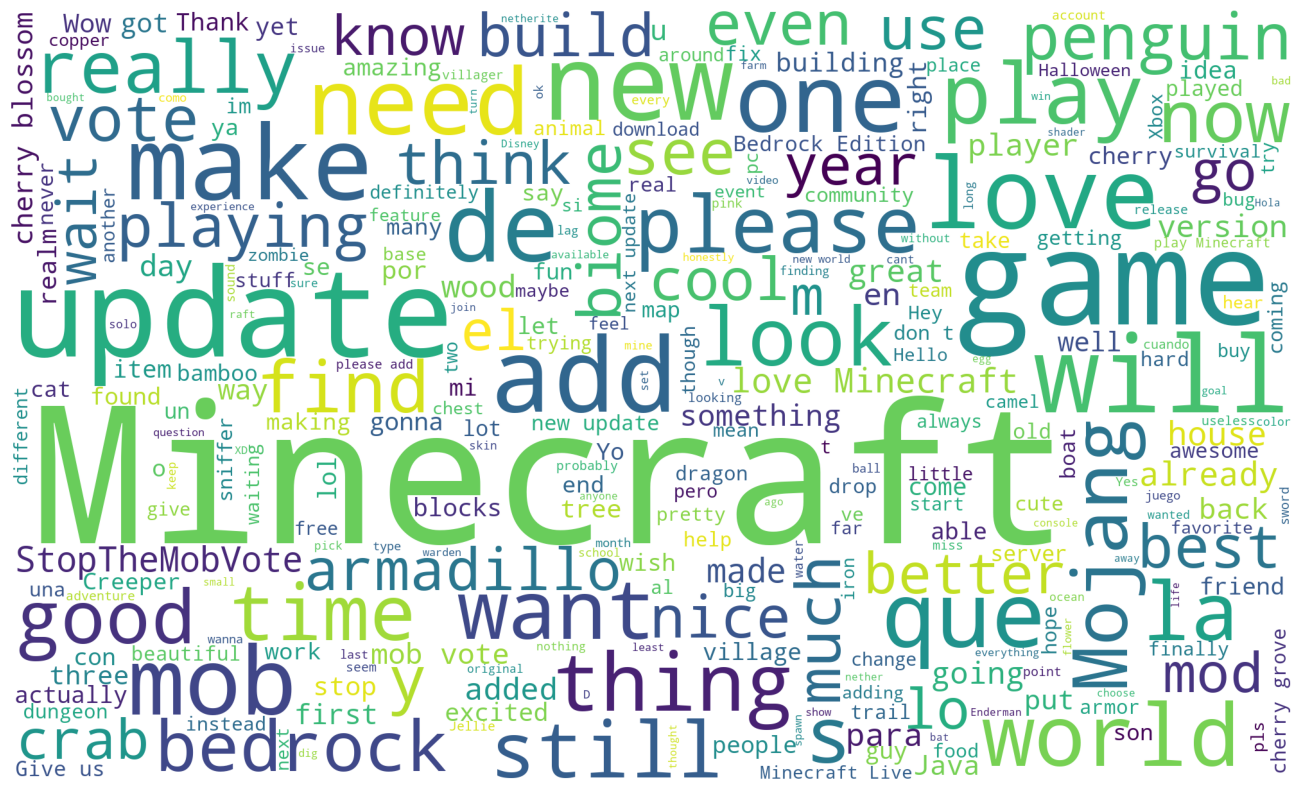

In [42]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(cmt_text)
plt.figure(figsize=(20,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Dự đoán

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

0.9467949316523804


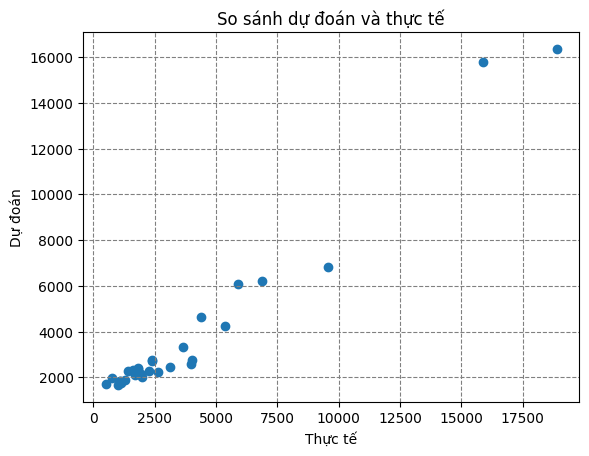

In [44]:
# dự đoán số lượt reactions của bài viết dựa trên các yếu tố nhất định

X = all_reactions[['shares', 'comments']]
y = all_reactions['reaction_count']

best_score = 0
best_model = 0
X_best, y_best = 0, 0
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_model = model
        X_best, y_best = X_test, y_test


print(best_model.score(X_best, y_best))
y_pred_best = best_model.predict(X_best)

plt.scatter(y_best, y_pred_best)
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('So sánh dự đoán và thực tế')
plt.grid(True, ls='dashed', color='gray')

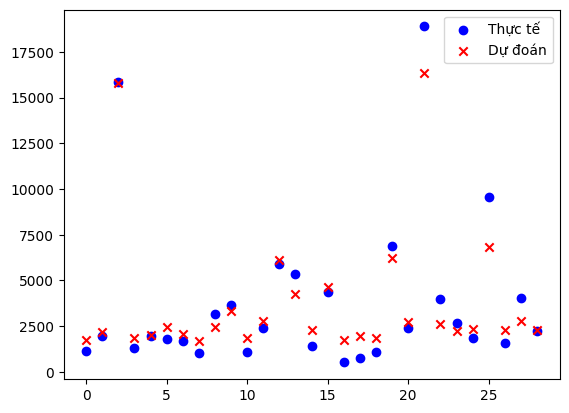

In [45]:
plt.scatter(x = range(0, len(y_pred_best)), y=y_best, color='blue', marker='o')
plt.scatter(x = range(0, len(y_pred_best)), y=y_pred_best, color='red', marker='x')
plt.legend(['Thực tế', 'Dự đoán'])